# Recurrent Neural Network(RNN)

- sequential data: 텍스트, 음성, 영상, 시계열 데이터처럼 순서가 있는 데이터
  - time-series data: 센서 데이터, 지진파, DNA 염기서열, 주가 변동
- **Feed Forward Neural Network**
  - 입력의 흐름이 앞으로만 진행되는 신경망
  - 하나의 배치만 사용
  - 정방향 계산 수행 후 다음 배치 처리 시 전 배치는 사용되지 않고 버려짐
  - 순차 데이터 처리에 부적합
- **Recurrent Neural Network**
  - 순차적인 데이터를 처리하기 위해 고안된 신경망
  - time-step(타임스텝): RNN에서 샘플을 처리하기 위한 한 단계
  - 3개의 샘플의 샘플을 처리하는 순환 신경망
  - ${O_a}$: 샘플 a 정보 및 출력
  - ${O_b}$: 샘플 b 정보 및 출력
  - ${O_c}$: 샘플 c 정보 및 출력
- 셀의 가중치와 절편
  - 특성 개수 f
  - 셀의 뉴런 개수 p
  - ${f*x}+p+p^2+p$
- 마지막 time-step의 은닉 상태의 ${h_f}$ 정보만 출력
- RNN을 연속적으로 수행한 경우 
  - 선두 계층은 2차원 배열로 샘플의 정보를 전달하고 마지막의 time-step ${h_f}$만 1차원 배열로 출력

### 1. Using IMDB data-set
- Import `imdb`
  - 리뷰 데이터를 positive(1), negative(0)로 분류한 단어 데이터 세트
- Using `.load_data()`
  - **`num_words=_int`**: 전체 데이터 중 잦게 등장하는 단어 개수를 지정

In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

print(train_input.shape, test_input.shape)

17464789/17464789 [==============================] - 2s 0us/step
(25000,) (25000,)


> 각 train-set, test-set 마다 25000개의 데이터 포함

In [4]:
print(train_input[:10])
print(train_target[:10])

[list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 14, 69, 188, 

> 입력 데이터는 인덱스 마다 분리된 단어인 여러 개의 **토큰**으로 구성되어 있고, 타겟 데이터는 positive(1), negative(0)으로 이루어져 있음을 확인 가능

### 2. Create a validation-set
- Import `sklearn.model_selection`
- Using **`train_test_split()`**

In [3]:
from sklearn.model_selection import train_test_split

train_input, valid_input, train_target, valid_target = train_test_split(
    train_input, train_target, random_state=42, test_size=0.2
)

### 3. Analysis of train-set
- 리스트 내포를 이용해 train_input 내 원소를 순회하여 길이를 계산
- `.mean()`, `.median()` 사용으로 평균과 중간값을 계산
- Import `numpy` library
  - Using `.array()`
  - Using `.mean()`
  - Using `.median()`

In [4]:
import numpy as np

length = np.array([len(x) for x in train_input])

print(np.mean(length), np.median(length))

239.00925 178.0


### 4. Data histogram visualization
- Import `matplotlib.pyplot`
  - Using **`hist()`**

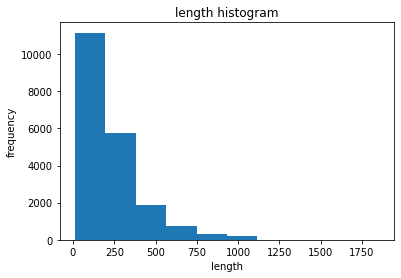

In [5]:
import matplotlib.pyplot as plt
plt.hist(length)
plt.xlabel("length")
plt.ylabel("frequency")
plt.title("length histogram")
plt.show()

> 대부분의 리뷰 데이터 길이는 300 미만이고 평균이 중간값보다 높은 이유는 마지막 데이터 길이로 갈 수록 큰 데이터가 존재하기 때문

### 5. Train-set preprocessing
- 시퀀스 데이터의 길이를 맞추는 함수를 제공하므로 keras 라이브러리를 사용 
- Import **`tensorflow.keras.preprocessing.sequence`**
  - Using `pad_sequences`
    - **`maxlen=_int`**: 최대 시퀀스의 길이 지정, 미지정시 가장 긴 시퀀스를 기준으로 패딩 적용

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
#checkout
print(train_seq.shape)

(20000, 100)


In [9]:
#additionally checkout first sample
print(train_seq[0])
print(train_seq[0][-10:])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]
[  6   2  46   7  14  20  10  10 470 158]


### 6. One-hot encoding
- 정수값을 배열에서 해당 정수 위치의 원소만 1이고 나머지는 모두 0으로 변환
- 단어 수를 길이로 하는 배열로 one-hot 인코딩을 진행
- Import `keras` library
  - Using **`keras.utils.to_categorical()`**


In [7]:
from tensorflow import keras

train_oh = keras.utils.to_categorical(train_seq)
#checkout
print("train_oh\n",train_oh.shape)
print(train_oh[0][0][:12])
print(np.sum(train_oh[0][0]))

train_oh
 (20000, 100, 500)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
1.0


> 처음 12개 원소를 출력해 11번 인덱스 원소가 1이라는 것을 확인했고, 모든 인덱스 원소를 더해 1이 나온 것도 확인 할 수 있음
따라서 모든 토큰이 정상적으로 인코딩 된 것을 알 수 있음

### 7. Valid-set preprocessing
- 훈련 세트와 동일한 시퀀스 패딩을 적용하고, one-hot 인코딩을 진행

In [8]:
#pad_sequence
valid_seq = pad_sequences(valid_input, maxlen=100)

#one-hot encoding
valid_oh = keras.utils.to_categorical(valid_seq)

#checkout
print("valid_oh\n",valid_oh.shape)
print(valid_oh[0][0][:12])
print(np.sum(valid_oh[0][0]))

valid_oh
 (5000, 100, 500)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1.0


### 8. Create a Recurrent neural network(RNN) model
- Using **`keras.layers.SimpleRNN()`**
  - 순환 계층을 구현한 클래스
  - `units=_int`: 순환 계층의 뉴런 개수(매개변수 명 생략 가능)
  - `input_shape=(100, 500)`: 샘플의 크기
  - `activation=tanh`

In [12]:
#SimpleRNN
model = keras.Sequential([
    keras.layers.SimpleRNN(8, input_shape=(100, 500)),
    keras.layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


### 9. Training a Recurrent neural network model
- RMSprop Optimizer 사용하는 대신 기존 LR 사용을 하지 않기 위해 별도 RMSprop 객체 생성
- Using **`keras.optimizers.RMSprop()`**
  - Using **`learnig_rate=_1E`**: 지수표기법 사용
- Using **`keras.callbacks.ModelCheckpoint()`**
- Using **`keras.callbacks.EarlyStopping()`**
- Using `history()`


In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4) #lr= 0.0001

model.compile(optimizer=rmsprop, loss="binary_crossentropy", metrics=["accuracy"])

checkpoint_model = keras.callbacks.ModelCheckpoint("best-simplernn-model.h5", save_best_only=True,)

early_stopping_model = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
    train_oh, train_target, epochs=50, batch_size=64, validation_data=(valid_oh, valid_target),
    callbacks=([checkpoint_model, early_stopping_model])
)



Epoch 1/50
313/313 [==============================] - 26s 72ms/step - loss: 0.6988 - accuracy: 0.5092 - val_loss: 0.6896 - val_accuracy: 0.5406
Epoch 2/50
313/313 [==============================] - 22s 69ms/step - loss: 0.6789 - accuracy: 0.5743 - val_loss: 0.6675 - val_accuracy: 0.6006
Epoch 3/50
313/313 [==============================] - 22s 70ms/step - loss: 0.6586 - accuracy: 0.6237 - val_loss: 0.6492 - val_accuracy: 0.6378
Epoch 4/50
313/313 [==============================] - 23s 73ms/step - loss: 0.6330 - accuracy: 0.6720 - val_loss: 0.6251 - val_accuracy: 0.6842
Epoch 5/50
313/313 [==============================] - 22s 70ms/step - loss: 0.6129 - accuracy: 0.6989 - val_loss: 0.6117 - val_accuracy: 0.6946
Epoch 6/50
313/313 [==============================] - 22s 70ms/step - loss: 0.5958 - accuracy: 0.7161 - val_loss: 0.5938 - val_accuracy: 0.7138
Epoch 7/50
313/313 [==============================] - 22s 70ms/step - loss: 0.5799 - accuracy: 0.7297 - val_loss: 0.5775 - val_accuracy:

### 10. Check training loss and validation loss with graph
- Using `.plot()`
- Using `.history`
- Using `.legend()`

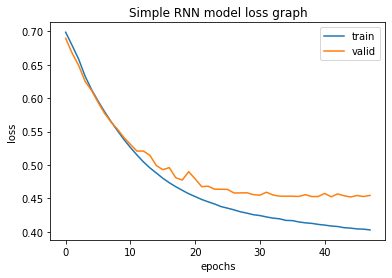

In [14]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train", "valid"])
plt.title("Simple RNN model loss graph")
plt.show()

> train loss는 꾸준히 감소하는 경향이 있으나, valid loss는 감소세가 점점 둔화하는 경향을 보이고 있음

### 11. Using Embedding to create a embed model
- 단어를 고정된 크기의 실수 벡터로 표현
- one-hot 인코딩 방식보다 직관적임
- Using **` keras.layers.Embedding()`**
  - `input_dim=_int`: 입력 차원 크기
  - `output_dim=_int`: 임베딩된 벡터 크기
  - `input_length=None`(default): 입력 시퀀스 길이
  

In [9]:
embed_model = keras.Sequential([
    keras.layers.Embedding(500, 16, input_length=(100)),
    keras.layers.SimpleRNN(8),
    keras.layers.Dense(1, activation="sigmoid")
])

embed_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn (SimpleRNN)      (None, 8)                 200       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


### 12. Training a Recurrent neural network model with Embedding
- RMSprop Optimizer 사용하는 대신 기존 LR 사용을 하지 않기 위해 별도 RMSprop 객체 생성
- Using **`keras.optimizers.RMSprop()`**
  - Using **`learnig_rate=_1E`**: 지수표기법 사용
- Using **`keras.callbacks.ModelCheckpoint()`**
- Using **`keras.callbacks.EarlyStopping()`**
- Using `history()`


In [11]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4) #lr= 0.0001

embed_model.compile(optimizer=rmsprop, loss="binary_crossentropy", metrics=["accuracy"])

checkpoint_embed_model = keras.callbacks.ModelCheckpoint("best-embedding-model.h5", save_best_only=True,)

early_stopping_embed_model = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = embed_model.fit(
    train_seq, train_target, epochs=50, batch_size=64, validation_data=(valid_seq, valid_target),
    callbacks=([checkpoint_embed_model, early_stopping_embed_model])
)

Epoch 1/50
313/313 [==============================] - 28s 85ms/step - loss: 0.6725 - accuracy: 0.5940 - val_loss: 0.6477 - val_accuracy: 0.6570
Epoch 2/50
313/313 [==============================] - 26s 84ms/step - loss: 0.6307 - accuracy: 0.6873 - val_loss: 0.6216 - val_accuracy: 0.7048
Epoch 3/50
313/313 [==============================] - 26s 84ms/step - loss: 0.6051 - accuracy: 0.7251 - val_loss: 0.5994 - val_accuracy: 0.7280
Epoch 4/50
313/313 [==============================] - 28s 88ms/step - loss: 0.5827 - accuracy: 0.7465 - val_loss: 0.5773 - val_accuracy: 0.7490
Epoch 5/50
313/313 [==============================] - 27s 87ms/step - loss: 0.5614 - accuracy: 0.7612 - val_loss: 0.5638 - val_accuracy: 0.7436
Epoch 6/50
313/313 [==============================] - 26s 84ms/step - loss: 0.5408 - accuracy: 0.7731 - val_loss: 0.5412 - val_accuracy: 0.7644
Epoch 7/50
313/313 [==============================] - 27s 86ms/step - loss: 0.5223 - accuracy: 0.7829 - val_loss: 0.5301 - val_accuracy:

### 13. Check training loss and validation loss with graph
- Using `.plot()`
- Using `.history`
- Using `.legend()`

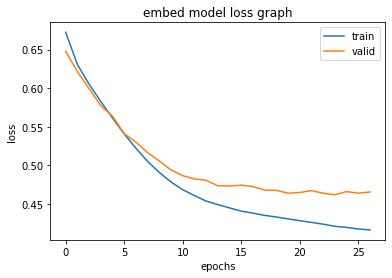

In [12]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train", "valid"])
plt.title("embed model loss graph")
plt.show()

> 임베딩을 사용했다고 해서 확실한 성능 개선을 보장하는 것은 아니지만, 방대한 양의 단어 데이터를 처리할 때 효율이 증가할 것이라 판단함